![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

<font color='red'>No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases.</font>



# 0) Cambiar el nombre del archivo

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E02_Tu_Rut.ipynb" a "E02_12345678-9.ipynb"


# 1) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 2) Corrección de Perspectiva

(5 Puntos)

Para la siguiente imagen, corrija la perspectiva de tal forma que el borde del reloj sea un círculo

`https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png`



--2022-08-28 23:18:54--  https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7gr195hwmjebq8b/clock.png [following]
--2022-08-28 23:18:54--  https://www.dropbox.com/s/raw/7gr195hwmjebq8b/clock.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7339857838b83b84620c3ca1e2.dl.dropboxusercontent.com/cd/0/inline/Br7YNb8EQMohW0dcyTYowdX0fO0-MsRZ_7C_Os9O_Rth1x5B3lk0YR9d_pBGsyxtCWNno0y_VzR17b3sdzUAVrnmUSVnNiIK_4S8fdUobqNwLwUDlW9mRT2Hqfom8orYV2z4yBa_afhPBtr2TLCZFHKzrVQqCTxakdmFERBkrE5qZQ/file# [following]
--2022-08-28 23:18:54--  https://uc7339857838b83b84620c3ca1e2.dl.dropboxusercontent.com/cd/0/inline/Br7YNb8EQMohW0dcyTYowdX0fO0-MsRZ_7C_Os9O_Rth1x5B3lk0YR9d_pBGsyxtCWNno0y_VzR17

(756, 1008)

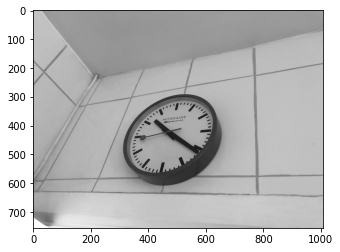

In [ ]:
!wget https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png
X = cv2.imread('clock.png',0)
plt.imshow(X,cmap='gray')
X.shape

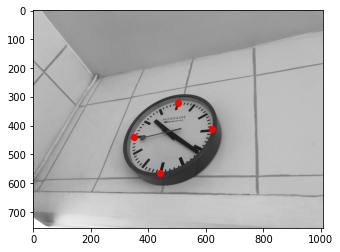

In [ ]:
# Coordenadas de las 12, 3, 6 y 9 (mp = m')
xp = np.array([502,620,440,352])  # buscadas manualmente
yp = np.array([322,412,565,440])  # buscadas manualmente
i = np.array([0,1,3,2,0])
plt.imshow(X,cmap='gray')
plt.scatter(xp,yp,c='red')
plt.show()

In [ ]:
# Coordenadas ideales del reloj, pertenecen a un circulo de radio r centrado en (q,q)
q = 350
r = 300
x = np.array([q,q+r,q,q-r])
y = np.array([q-r,q,q+r,q])

In [ ]:
# Estimation of H: mp = H*m

def homography_matrix(m,mp):
  (x ,y ) = m
  (xp,yp) = mp
  n       = len(x)
  A       = np.zeros((2*n,9))
  for i in range(n):
    j = i*2
    A[j  ,:] = [x[i], y[i], 1,     0,     0, 0, -x[i]*xp[i], -y[i]*xp[i], -xp[i]]
    A[j+1,:] = [  0  ,   0  , 0, x[i], y[i], 1, -x[i]*yp[i], -y[i]*yp[i], -yp[i]]
  np.save('Xmatrix',A)
  [U,S,V] = np.linalg.svd(A)
  h       = V[-1,:]
  H       = np.vstack([h[0:3], h[3:6], h[6:9]])
  return H

In [ ]:
print('mp  = ', (xp,yp))
print('m   = ', (x,y))

mm = np.vstack([x, y, np.array([1, 1, 1, 1])])
H2 = homography_matrix((x,y),(xp,yp))
mmp = np.dot(H2,mm)
mmp = mmp/mmp[-1,:]

print('Estimacion de mp a partir de m:')
print('mps = ', (mmp[0,:],mmp[1,:]))


mp  =  (array([502, 620, 440, 352]), array([322, 412, 565, 440]))
m   =  (array([350, 650, 350,  50]), array([ 50, 350, 650, 350]))
Estimacion de mp a partir de m:
mps =  (array([502., 620., 440., 352.]), array([322., 412., 565., 440.]))


In [ ]:
def homography(X,H):
  Hinv  = np.linalg.inv(H)
  Xp    = np.zeros((N,M),np.uint8)

  m = np.ones((N*M,3))
  t = 0
  for i in range(N):
    for j in range(M):
      m[t,0:2] = [j,i]
      t = t+1

  mph = np.dot(Hinv,m.T)  # Transformation m to mp
  mp  = np.divide(mph[0:2,:],mph[2,:])
  mpf = np.fix(mp).astype(int)

  ip = mpf[1,:]
  jp = mpf[0,:]
  ktj = np.logical_and(jp>=0,jp<M)
  kti = np.logical_and(ip>=0,ip<N)
  kt  = np.logical_and(kti,ktj)

  t = 0
  for i in range(N):
    for j in range(M):
      if kt[t]:
        Xp[i,j] = X[ip[t],jp[t]]
      t = t+1
  return Xp

Imagen izquierda: Reloj Circular       | Imagen derecha: Reloj Original


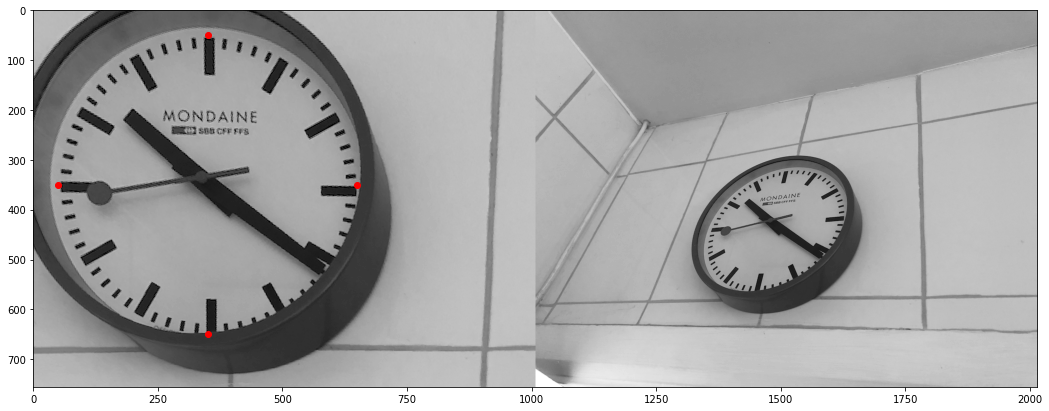

In [ ]:
Hinv  = np.linalg.inv(H2)
(N,M) = (756, 1008)
Y = homography(X,Hinv)
Z = np.concatenate((Y,X),axis=1)

print('Imagen izquierda: Reloj Circular       | Imagen derecha: Reloj Original')
plt.figure(figsize=(18,24))
plt.imshow(Z,cmap='gray')
plt.scatter(x,y,c='red')
plt.show()


# 3) Proyección en Perspectiva 3D -> 2D


Una pirámide definido como 5 puntos ${\bf p}_i$ en el sistema de coordenadas $(X_i',Y_i',Z_i')$ con los valores:

$p_1 = (0, 0, 0)$

$p_2 = (2, 0, 0)$

$p_3 = (2, 2, 0)$

$p_4 = (0, 2, 0)$

$p_5 = (1, 1, 2)$

(los primeros 4 puntos son de la base horizontal cuadrada de la pirámide, el último punto es el vértice superior)




## 3.1) Definición de coordenadas homogéneas

(1 punto)

Defina una matriz Mp de 4x5 elementos que defina los 5 puntos de la pirámide en coordenadas homogéneas en el sistema $(X_i',Y_i',Z_i')$. Es decir, los 5 puntos se deben almacenar en la variable Mp de 4x5 elementos, donde cada columna debe ser $(X'_i,Y'_i,Z'_i,1)$.


In [ ]:
p1 = np.array([0, 0, 0, 1]).reshape(4,1)
p2 = np.array([2, 0, 0, 1]).reshape(4,1)
p3 = np.array([2, 2, 0, 1]).reshape(4,1)
p4 = np.array([0, 2, 0, 1]).reshape(4,1)
p5 = np.array([1, 1, 2, 1]).reshape(4,1)

Mp = np.hstack([p1,p2,p3,p4,p5])
print(Mp)


[[0 2 2 0 1]
 [0 0 2 2 1]
 [0 0 0 0 2]
 [1 1 1 1 1]]


## 3.2) Transformación 3D -> 3D

(1 punto)

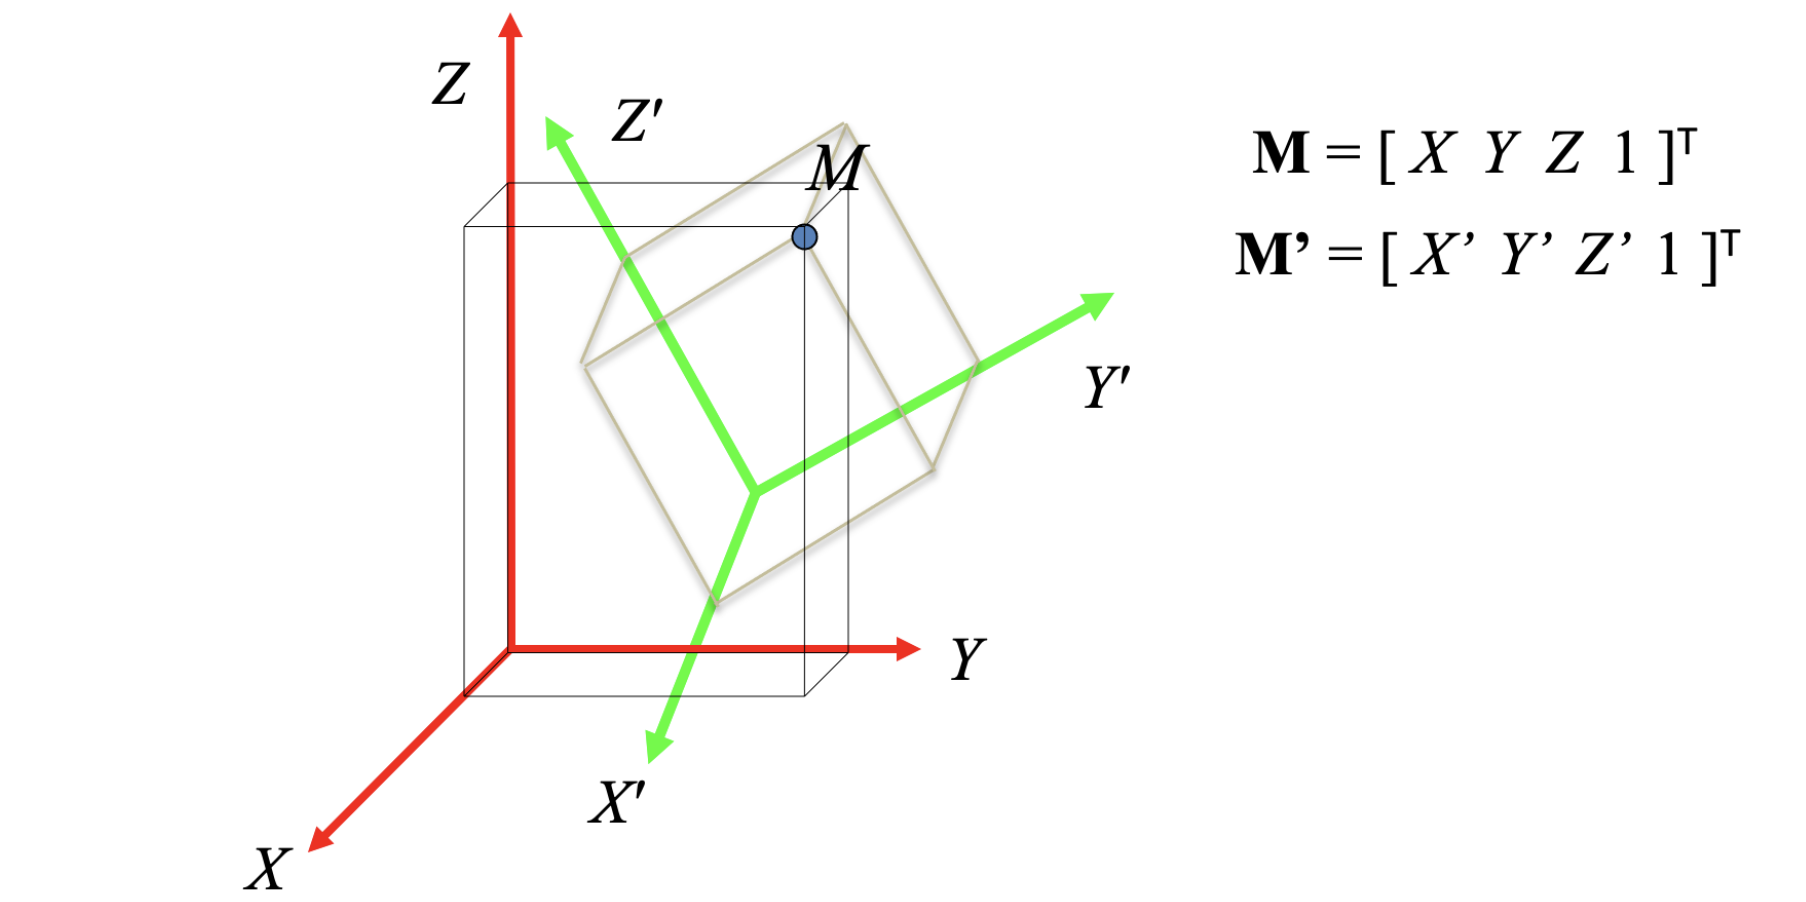

Transforme los puntos de Mp con una transformación Euclideana cuya traslación y rotación son:

* tx = 10

* ty = 20

* tz = 400

* wx = 20 grados

* wy = 30 grados

* wz = 45 grados

Esta transformación es de un sistema de coordenadas $(X',Y',Z')$ a un sistema de coordenadas $(X,Y,Z)$.

Los 5 puntos transformados se deben almacenar en la variable M de 4x5 elementos, donde cada columna debe ser $(X_i,Y_i,Z_i,1)$.



In [ ]:
# Function extracted from library pyxvis, written by Christian Pieringer, Domingo Mery
def rotation_matrix_3d(wx, wy, wz):
  R = np.array([
        [ np.cos(wy) * np.cos(wz), -np.cos(wy) * np.sin(wz),  np.sin(wy)],
        [ np.sin(wx) * np.sin(wy) * np.cos(wz) + np.cos(wx) * np.sin(wz),
         -np.sin(wx) * np.sin(wy) * np.sin(wz) + np.cos(wx) * np.cos(wz),
         -np.sin(wx) * np.cos(wy)],
        [-np.cos(wx) * np.sin(wy) * np.cos(wz) + np.sin(wx) * np.sin(wz),
          np.cos(wx) * np.sin(wy) * np.sin(wz) + np.sin(wx) * np.cos(wz),
          np.cos(wx) * np.cos(wy)]
  ])
  return R

In [ ]:
wx = (20 / 180.0) * np.pi #Rotation in radians
wy = (30 / 180.0) * np.pi #Rotation in radians
wz = (45.0 / 180.0) * np.pi #Rotation in radians

# Translation tx,ty in cm
t = np.array([10.0, 20.0, 400.0]).reshape(3,1)

R = rotation_matrix_3d(wx,wy,wz)  # Generate the rotation matrix R

# Euclidean transformation matrix H = [R t; 0 0 1]
H = np.hstack([R, t])
H = np.vstack([H, np.array([0, 0, 0, 1])])


M = np.dot(H, Mp)  # Transformation m to mp

print(M)

[[ 10.          11.22474487  10.           8.77525513  11.        ]
 [ 20.          21.57077081  22.6578521   21.08708129  20.73652978]
 [400.         399.8192265  400.96737905 401.14815255 402.11128489]
 [  1.           1.           1.           1.           1.        ]]


## 3.3) Transformación 3D -> 2D

(1 punto)

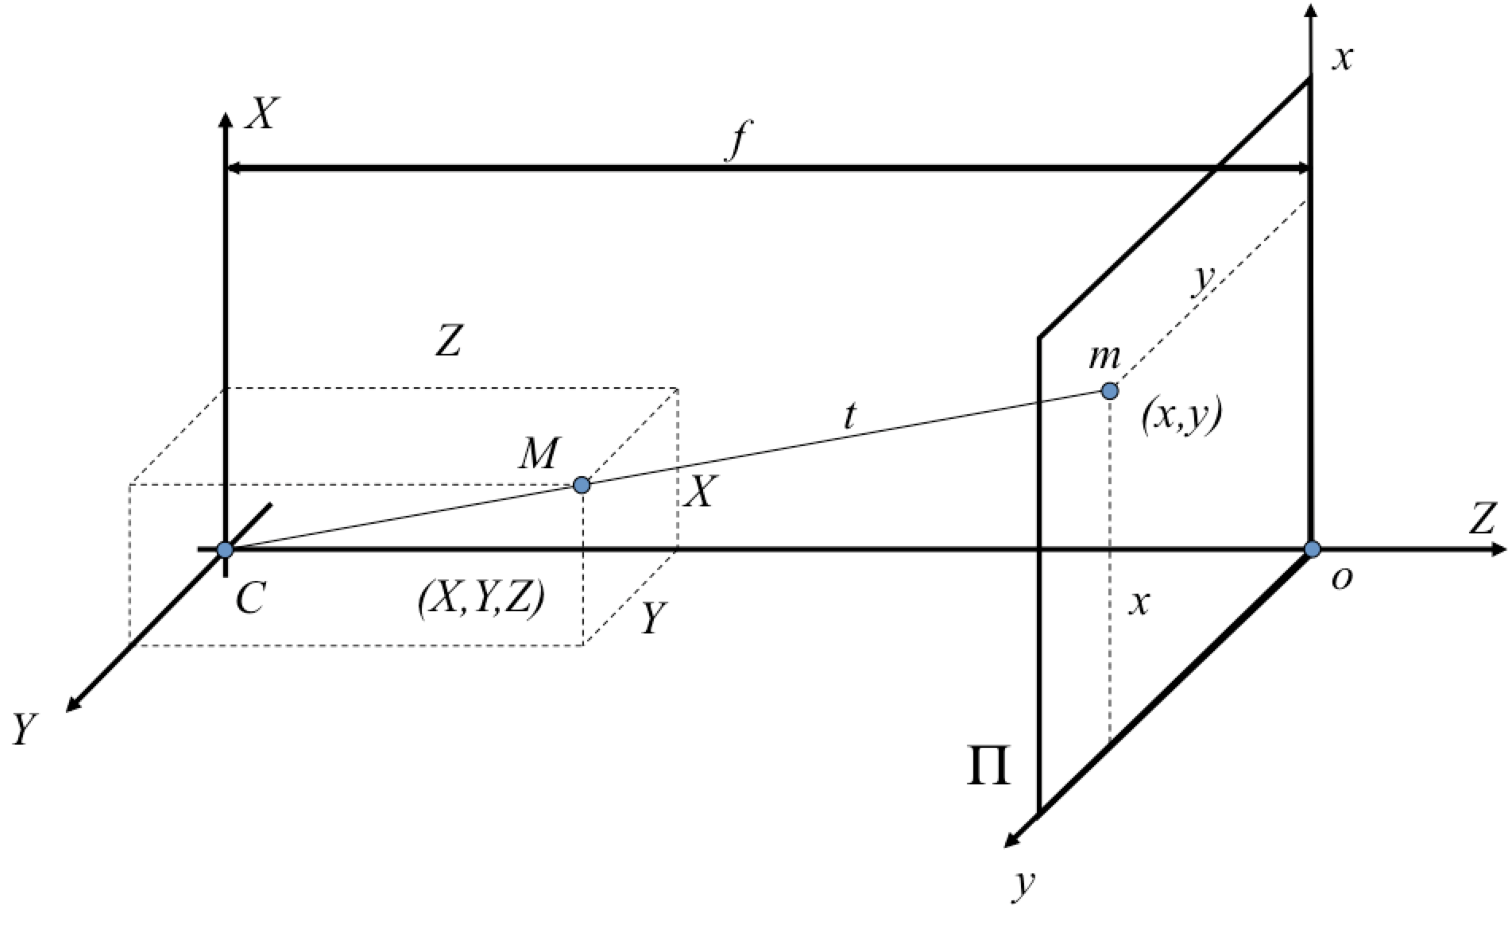

Proyecte los 5 puntos de M, que están en coordenadas $(X,Y,Z)$ a un plano de proyección $(x,y)$ que se encuentra perpendicular al eje $Z$ a una distancia focal $f = 1000$. Los 5 puntos transformados se deben almacenar en la variable m de 3x5 elementos, donde cada columna debe ser $(x_i,y_i,1)$.

In [ ]:
def perspective_matrix(f):
  P = np.array([
        [f, 0, 0, 0],
        [0, f, 0, 0],
        [0, 0, 1, 0]
  ])
  return P

In [ ]:
f = 1000  # Focal distance in cm

P = perspective_matrix(f)  # Create the projection matrix P

m = np.dot(P, M)  # Transformation M to m
m = m / m[-1]  # Homogeneous coordinates requires to be normalized by the matrix element (3, 1)

print(m)


[[25.         28.07455002 24.93968468 21.87534723 27.35561128]
 [50.         53.95130945 56.50796868 52.5668164  51.56913164]
 [ 1.          1.          1.          1.          1.        ]]


## 3.4) Transformación 2D -> 2D

(1 punto)

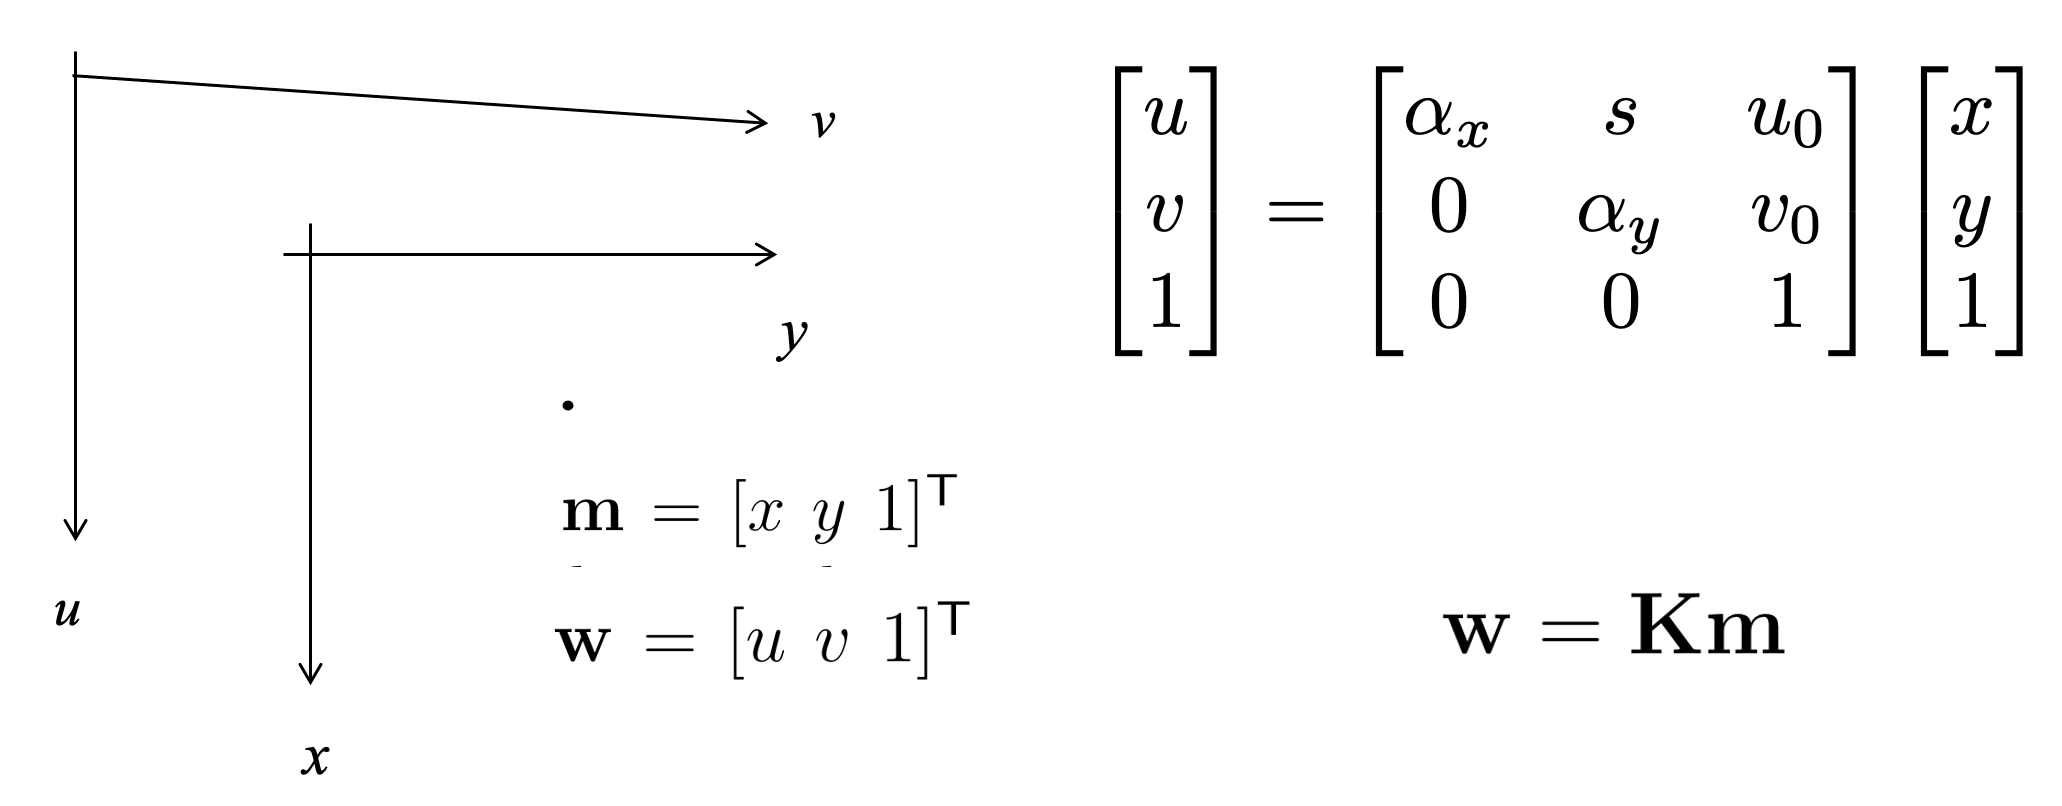



Transforme los 5 puntos del sistema de coordenas $(x,y)$ a las coordenadas de la imagen $(u,v)$ usando la ecuación ${\bf w} = {\bf Km}$ mostrada en la figura. Los elementos de ${\bf K}$ son:

* $\alpha_x = \alpha_y = 3.1$

* $s=0.05$

* $u_0 = 110$

* $v_0 = 235$

Los 5 puntos transformados se deben almacenar en la variable w de 3x5 elementos, donde cada columna debe ser $(u_i,v_i,1)$.


In [ ]:
ax = 3.1
ay = 3.1
s  = 0.05
u0 = 110
v0 = 235


K = np.array([
    [ax, s, u0],
    [0 ,ay, v0],
    [0 , 0,  1]
])



w = np.dot(K,m)

print(w)

[[190.         199.72867052 190.13842094 180.44191724 197.38085154]
 [390.         402.24905928 410.17470291 397.95713085 394.86430808]
 [  1.           1.           1.           1.           1.        ]]


## 3.5 Transformación total 3D -> 2D

(1 punto)

Encuentre la matriz ${\bf A}$ tal que realice la transformación de $(X',Y',Z')$ a $(u,v)$, es decir que cumpla esta ecuación:

$\lambda {\bf w} = {\bf A}{\bf M}'$.

Para verificar que la matriz ${\bf A}$ esté correcta, realice la multiplicación de A por la matriz Mp y encuentre w. El resultado debe ser exactamente el mismo del paso anterior.

In [ ]:
A = np.dot(K,P)
A = np.dot(A,H)
w = np.dot(A,Mp)
w = w/w[-1]
print(w)

[[190.         199.72867052 190.13842094 180.44191724 197.38085154]
 [390.         402.24905928 410.17470291 397.95713085 394.86430808]
 [  1.           1.           1.           1.           1.        ]]


## 3.6) Grafica

(1 punto)

Grafique la pirámide proyecta en las coordenadas $(u,v)$. En esta gráfica deben estar tanto los vértices como las líneas que unen los vértices de la pirámide.

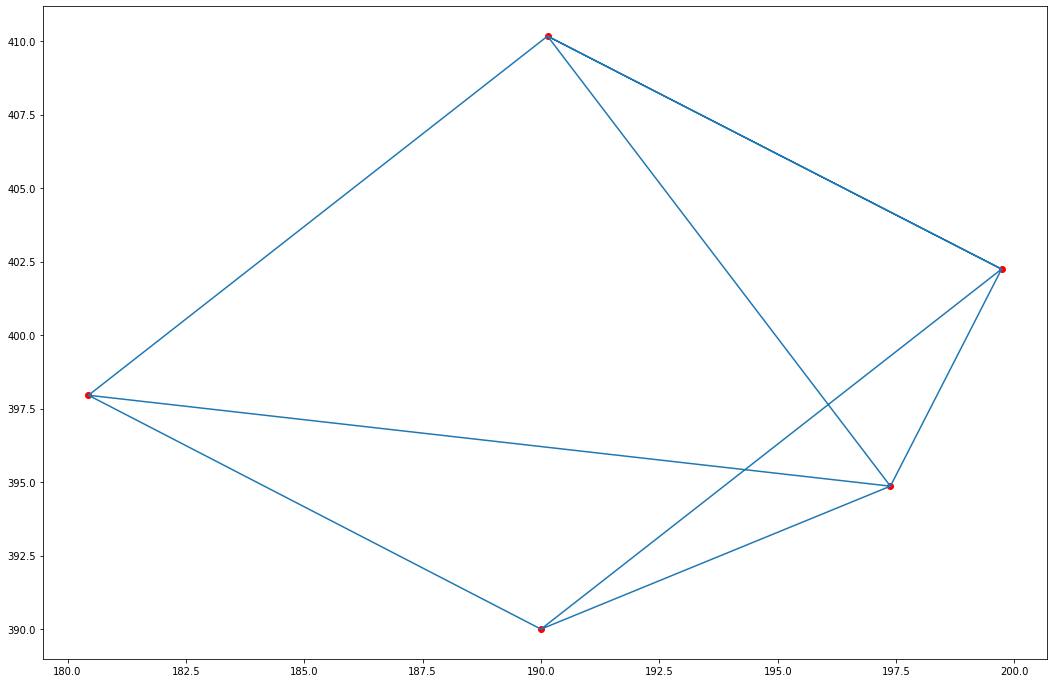

In [ ]:
u = w[0,:]
v = w[1,:]

s = np.array([0, 1, 4, 0, 3, 4, 2, 1, 2, 3])

plt.figure(figsize=(18,12))
plt.plot(u[s],v[s])
plt.scatter(u,v,c='red')
plt.show()
